# Chronic Kidney Disease (CKD) Data Analysis

## Introduction
Chronic Kidney Disease (CKD) is a global health problem that affects millions of people every year. 
This project applies **data analytics techniques** to explore and analyze the CKD dataset, with the goal of 
identifying key risk factors and drawing insights that can support early detection and prevention.

## Objectives
- To clean and prepare the CKD dataset for analysis.  
- To perform exploratory data analysis (EDA) and identify important trends and patterns.  
- To visualize risk factors associated with CKD.  
- To interpret findings and provide data-driven conclusions.  

In [7]:
import pandas as pd
file = "Data.xlsx"
# Load all sheets
sheets =  pd.read_excel(file,sheet_name=None) # dict of DataFrames
# See available sheet name
print(sheets.keys())

dict_keys(['Data Description', 'CKD Risk Data', 'Correlation', 'Regression Model'])


In [8]:
# Load a specific sheet by name which is CKD Risk Data in our case
df = sheets["CKD Risk Data"]
df.head()

,ID,Age,Residence,CKD Risk Score,Diabetes Mellitus,Blood Pressure,Hypertension,Blood Sugar,Blood Glucose,Reticulocyte Count,Packed Cell Volume,Haemoglobin,Red Blood Cell Count,White Blood Cell Count,Blood Urea,Serum Creatinine,Alcohol Intake,Physical Activity
0,1,86,Urban,82.194168,No,123,No,2,119,1.071754,20,14.7,6.05,6817,3.282934,41.590812,High,Active
1,2,66,Urban,43.231758,Yes,103,No,1,238,1.196210,23,15.1,5.04,6438,1.819046,84.642535,High,Active
2,3,24,Rural,71.791997,Yes,151,No,0,372,2.531091,40,13.6,2.67,11071,2.495975,157.521097,High,Active
3,4,40,Rural,39.146159,Yes,165,No,2,448,1.980966,30,11.8,6.30,6594,1.378014,190.107385,High,Active
4,5,43,Urban,64.029626,No,113,No,1,301,2.948063,52,15.4,4.35,12708,2.264839,152.740807,High,Active


In [9]:
df.shape

(250, 18)

In [10]:
df.isnull().sum()

ID                         0
Age                        0
Residence                  0
CKD Risk Score             0
Diabetes Mellitus          0
Blood Pressure             0
Hypertension               0
Blood Sugar                0
Blood Glucose              0
Reticulocyte Count         0
Packed Cell Volume         0
Haemoglobin                0
Red Blood Cell Count       0
White Blood Cell Count     0
Blood Urea                 0
Serum Creatinine           0
Alcohol Intake            74
Physical Activity          0
dtype: int64

## Pandas interprets None (Python’s null object) as missing data (NaN)
By default, pandas treats both None and NaN (from NumPy) as null values.
"None" it appears as plain text in the Excel sheet, pandas will treat it as a string, not a null.
If the Excel cell is actually empty (or typed as None in Python), pandas will interpret it as NaN.
That’s why our column is showing 74 nulls.

In [11]:
#This will show you whether you have "None" (string) or actual null values
df["Alcohol Intake"].unique()

array(['High', 'Moderate', nan], dtype=object)

In [12]:
#"None" is meant to be a category (like High, Moderate, None), you should replace real nulls (NaN) with the string "None":
df["Alcohol Intake"] = df["Alcohol Intake"].fillna("None")
#Now pandas will treat "None" as a valid category, not missing data.
df.isnull().sum()

ID                        0
Age                       0
Residence                 0
CKD Risk Score            0
Diabetes Mellitus         0
Blood Pressure            0
Hypertension              0
Blood Sugar               0
Blood Glucose             0
Reticulocyte Count        0
Packed Cell Volume        0
Haemoglobin               0
Red Blood Cell Count      0
White Blood Cell Count    0
Blood Urea                0
Serum Creatinine          0
Alcohol Intake            0
Physical Activity         0
dtype: int64

In [13]:
df.describe()

,ID,Age,CKD Risk Score,Blood Pressure,Blood Sugar,Blood Glucose,Reticulocyte Count,Packed Cell Volume,Haemoglobin,Red Blood Cell Count,White Blood Cell Count,Blood Urea,Serum Creatinine
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,53.260000,57.983781,120.780000,2.472000,279.832000,2.065026,36.708000,11.000800,4.618600,9378.124000,2.391250,117.983519
std,72.312977,20.759098,17.737879,35.155701,1.763421,122.550882,0.585775,10.149423,3.661961,1.076358,3227.389973,0.819981,40.637299
min,1.000000,20.000000,4.323176,60.000000,0.000000,70.000000,0.874126,20.000000,5.000000,2.520000,4018.000000,0.770744,38.237198
25%,63.250000,35.250000,46.676049,91.000000,1.000000,175.250000,1.653822,27.250000,8.100000,3.892500,6564.000000,1.718965,84.701509
50%,125.500000,52.500000,58.138066,119.500000,2.000000,269.500000,2.056248,37.000000,10.900000,4.620000,9296.000000,2.383499,117.691690
75%,187.750000,72.000000,71.345585,153.000000,4.000000,380.500000,2.485562,45.000000,14.300000,5.507500,12051.750000,3.079916,151.857328
max,250.000000,89.000000,96.128144,179.000000,5.000000,499.000000,3.409239,54.000000,17.500000,6.460000,14996.000000,4.172717,205.755871


In [14]:
df['CKD Risk Score'].describe()

count    250.000000
mean      57.983781
std       17.737879
min        4.323176
25%       46.676049
50%       58.138066
75%       71.345585
max       96.128144
Name: CKD Risk Score, dtype: float64

In [15]:
df["CKD Risk Score"].skew()

np.float64(-0.2431038939876664)

In [16]:
df.kurtosis(numeric_only=True)

ID                       -1.200000
Age                      -1.238321
CKD Risk Score           -0.264414
Blood Pressure           -1.234523
Blood Sugar              -1.341916
Blood Glucose            -1.244434
Reticulocyte Count       -0.678210
Packed Cell Volume       -1.186234
Haemoglobin              -1.192259
Red Blood Cell Count     -0.923208
White Blood Cell Count   -1.197195
Blood Urea               -0.948485
Serum Creatinine         -0.965084
dtype: float64

In [17]:
df.skew(numeric_only=True)

ID                        0.000000
Age                      -0.011807
CKD Risk Score           -0.243104
Blood Pressure           -0.000313
Blood Sugar               0.046731
Blood Glucose             0.105384
Reticulocyte Count        0.088754
Packed Cell Volume       -0.010880
Haemoglobin               0.019327
Red Blood Cell Count     -0.198384
White Blood Cell Count    0.052796
Blood Urea               -0.043078
Serum Creatinine         -0.038642
dtype: float64

## Step 1: Concept — What is Linear Regression?

Linear regression is a method we use to model the relationship between one dependent variable (Y) and one or more independent variables (X₁, X₂, X₃, …).

The goal is to find a line (or hyperplane, if there are many predictors) that best fits the data:
CKD Risk Score=β0​+β1​X1​+β2​X2​+…+βn​Xn​+ε

Where:

β₀ = intercept (baseline CKD risk when all other predictors = 0)

β₁, β₂, … βₙ = coefficients showing how much each variable affects CKD risk

ε = error term (unexplained variation)

### Step 2: In our CKD Context ,dependent variable (Y) is__CKD Risk Score

Our independent variables (X) include:

Blood Pressure, Blood Sugar, Age, Residence, Diabetes Mellitus, Hypertension, Alcohol Intake, Physical Activity, etc.

So the model tries to answer:

“How do these health and lifestyle factors combine to predict a person’s CKD Risk Score?”

## Step 3: Multiple vs Simple Regression

Simple regression: uses one predictor, e.g. only Blood Pressure.

Multiple regression: uses many predictors, e.g. BP + Age + Diabetes + Alcohol Intake.

Our assignment says to do multiple regression, so we’ll include all predictors except Patient ID and CKD Risk Score.


In [18]:
# Step 1: Define dependent and independent variables
y = df["CKD Risk Score"]  # dependent variable

# Exclude CKD Risk Score and Patient ID from predictors
X = df.drop(["ID", "CKD Risk Score"], axis=1)

# Step 2: Define categorical variables
categorical_vars = ["Residence", "Diabetes Mellitus", "Hypertension", "Alcohol Intake", "Physical Activity"]

# Step 3: Encode categorical variables into dummy variables
X_encoded = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# 🔹 Step 3b: Convert any boolean columns to numeric (1/0)
X_encoded = X_encoded.astype(int)  # Converts True/False → 1/0 and keeps numeric columns as they are

# Step 4: Check the new columns
X_encoded.head()


,Age,Blood Pressure,Blood Sugar,Blood Glucose,Reticulocyte Count,Packed Cell Volume,Haemoglobin,Red Blood Cell Count,White Blood Cell Count,Blood Urea,Serum Creatinine,Residence_Urban,Diabetes Mellitus_Yes,Hypertension_Yes,Alcohol Intake_Moderate,Alcohol Intake_None,Physical Activity_Inactive,Physical Activity_Typical
0,86,123,2,119,1,20,14,6,6817,3,41,1,0,0,0,0,0,0
1,66,103,1,238,1,23,15,5,6438,1,84,1,1,0,0,0,0,0
2,24,151,0,372,2,40,13,2,11071,2,157,0,1,0,0,0,0,0
3,40,165,2,448,1,30,11,6,6594,1,190,0,1,0,0,0,0,0
4,43,113,1,301,2,52,15,4,12708,2,152,1,0,0,0,0,0,0


## 🧩 1. What happens without the constant

If you don’t include an intercept (the constant), your regression line (or plane, for multiple regression) is forced to go through the origin (0,0).

That means the model assumes:

when all predictors (X’s) are 0, the outcome (Y) is also 0.

In most real-life data — that’s rarely true.

Example:
If you’re predicting CKD Risk, and all inputs like Blood Pressure, Age, etc. were zero, the risk isn’t literally 0 — it’s just undefined or nonsensical. So forcing that relationship would bias all your estimates.

## 2. What the constant (intercept) does

Adding a constant tells the model:

“Fit the best line/plane through the data — it doesn’t have to pass through the origin.”

Mathematically, it adds this term:Y^=β0​+β1​X1​+β2​X2​+...+βn​Xn​
Here is the intercept (constant) — the model’s baseline prediction when all 
𝑋
X’s = 0.

## 3. Why we use sm.add_constant(X)
In statsmodels, it doesn’t automatically include the intercept like some libraries (e.g. sklearn).
So we use:
X = sm.add_constant(X)
This adds a column called 'const' with 1’s, representing that intercept term.
Without it, your model has no β0, and all your coefficients may shift incorrectly.

## 4. When not to use it

Only skip the constant if you have a very strong reason that 𝑌=0
Y=0 when all predictors = 0, which is extremely rare in natural data.

In [22]:
import statsmodels.api as sm

# Add constant (intercept)
X_with_const = sm.add_constant(X_encoded)

# Fit the model
model = sm.OLS(y, X_with_const).fit()

# View the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         CKD Risk Score   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     34.88
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           1.20e-55
Time:                        23:58:53   Log-Likelihood:                -909.01
No. Observations:                 250   AIC:                             1856.
Df Residuals:                     231   BIC:                             1923.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [27]:
# Create a DataFrame with exact column names and order from model.exog_names
X_new = pd.DataFrame(columns=model.model.exog_names)

# Fill in one row of scenario values
X_new.loc[0] = [
    1,        # const
    50,       # Age
    120,      # Blood Pressure
    5.0,      # Blood Sugar
    260,      # Blood Glucose
    2.25,     # Reticulocyte Count (note the trailing space)
    35,       # Packed Cell Volume
    12.5,     # Haemoglobin
    4.75,     # Red Blood Cell Count
    9250,     # White Blood Cell Count
    3.25,     # Blood Urea
    125,      # Serum Creatinine
    1,        # Residence_Urban
    1,        # Diabetes Mellitus_Yes
    1,        # Hypertension_Yes
    1,        # Alcohol Intake_Moderate
    0,        # Alcohol Intake_None
    0,        # Physical Activity_Inactive
    0         # Physical Activity_Typical
]

# Generate predictions
pred = model.get_prediction(X_new)

# Create summary frame with point estimate, confidence, and prediction intervals
pred_summary = pred.summary_frame(alpha=0.05)

# Display relevant output
pred_summary[['mean', 'mean_ci_lower', 'mean_ci_upper', 
              'obs_ci_lower', 'obs_ci_upper']]


,mean,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,87.983896,83.128548,92.839244,68.549649,107.418143


In [26]:
model.model.exog_names


['const',
 'Age',
 'Blood Pressure',
 'Blood Sugar',
 'Blood Glucose',
 'Reticulocyte Count ',
 'Packed Cell Volume',
 'Haemoglobin',
 'Red Blood Cell Count',
 'White Blood Cell Count',
 'Blood Urea',
 'Serum Creatinine',
 'Residence_Urban',
 'Diabetes Mellitus_Yes',
 'Hypertension_Yes',
 'Alcohol Intake_Moderate',
 'Alcohol Intake_None',
 'Physical Activity_Inactive',
 'Physical Activity_Typical']

### Step 1: What you’re looking at

These columns represent different types of estimates from your regression model for that new scenario you entered.

Column	Meaning
mean	The predicted (point estimate) of CKD Risk for that patient profile

mean_ci_lower / mean_ci_upper	The 95% Confidence Interval for the mean CKD risk (i.e., the range we’re 95% confident the average CKD risk for people like this lies in)

obs_ci_lower / obs_ci_upper	The 95% Prediction Interval for an individual’s CKD risk (i.e., the range where we expect a single person’s actual CKD risk might fall)

### Step 2: Interpret your results numerically
Statistic	Value	Interpretation

Point Estimate (mean)	87.98	The model predicts that a person with this profile has a CKD Risk of about 88 units.

Confidence Interval (83.13 – 92.84)	This means we are 95% confident that the average CKD risk for people with the same characteristics lies between 83.13 and 92.84.

Prediction Interval (68.55 – 107.42)	This means that for an individual person with those characteristics, their actual CKD risk is likely between 68.55 and 107.42, 95% of the time.	

### Step 3: Why are the intervals different?

The confidence interval is narrower because it’s about the mean prediction (less uncertainty).

The prediction interval is wider because it includes the extra uncertainty of individual variation.

In [28]:
# Combine dependent and encoded independent variables
corr_df = pd.concat([y, X_encoded], axis=1)

# Generate correlation matrix for numeric columns only
corr_matrix = corr_df.corr(numeric_only=True)

# 1️⃣ Correlation of each IV with CKD Risk Score (DV)
ckd_corr = corr_matrix['CKD Risk Score'].sort_values(ascending=False)
print("Correlation with CKD Risk Score:")
print(ckd_corr)

# 2️⃣ Identify virtually uncorrelated IVs (|r| < 0.05)
uncorrelated_IVs = ckd_corr[(ckd_corr > -0.05) & (ckd_corr < 0.05)]
print("\nVirtually Uncorrelated IVs (|r| < 0.05):")
print(uncorrelated_IVs)

# 3️⃣ Detect potential multicollinearity (|r| > 0.7 between IVs)
multi_collinear_pairs = []
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > 0.7:
            multi_collinear_pairs.append((i, j, corr_matrix.loc[i, j]))

multi_collinear_pairs = pd.DataFrame(multi_collinear_pairs, columns=['Var1', 'Var2', 'Correlation'])
print("\nPotential Multicollinearity Pairs (|r| > 0.7):")
print(multi_collinear_pairs)


Correlation with CKD Risk Score:
CKD Risk Score                1.000000
Blood Urea                    0.697648
Diabetes Mellitus_Yes         0.289036
Hypertension_Yes              0.286031
Residence_Urban               0.089786
Alcohol Intake_None           0.080606
Blood Pressure                0.067099
White Blood Cell Count        0.065147
Physical Activity_Typical     0.058804
Haemoglobin                   0.057391
Blood Sugar                   0.032851
Age                           0.018321
Reticulocyte Count           -0.004147
Packed Cell Volume           -0.016611
Blood Glucose                -0.055390
Serum Creatinine             -0.066160
Alcohol Intake_Moderate      -0.102783
Physical Activity_Inactive   -0.123766
Red Blood Cell Count         -0.127235
Name: CKD Risk Score, dtype: float64

Virtually Uncorrelated IVs (|r| < 0.05):
Blood Sugar            0.032851
Age                    0.018321
Reticulocyte Count    -0.004147
Packed Cell Volume    -0.016611
Name: CKD Risk Scor

In [29]:
# Combine dependent and encoded independent variables
corr_df = pd.concat([y, X_encoded], axis=1)

# Generate correlation matrix for numeric columns only
corr_matrix = corr_df.corr(numeric_only=True)

# 1️⃣ Correlation of each IV with CKD Risk Score (DV)
ckd_corr = corr_matrix['CKD Risk Score'].drop('CKD Risk Score').sort_values(ascending=False)
print("Correlation with CKD Risk Score:")
print(ckd_corr)

# 2️⃣ Identify virtually uncorrelated IVs (|r| < 0.05)
uncorrelated_IVs = ckd_corr[(ckd_corr > -0.05) & (ckd_corr < 0.05)]
print("\nVirtually Uncorrelated IVs (|r| < 0.05):")
print(uncorrelated_IVs)

# 3️⃣ Detect potential multicollinearity (|r| > 0.7 between IVs)
multi_collinear_pairs = []
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > 0.7:
            multi_collinear_pairs.append((i, j, corr_matrix.loc[i, j]))

multi_collinear_pairs = pd.DataFrame(multi_collinear_pairs, columns=['Var1', 'Var2', 'Correlation'])
print("\nPotential Multicollinearity Pairs (|r| > 0.7):")
print(multi_collinear_pairs)

# 4️⃣ Identify key IVs for scatter diagrams (numerical only, not dummies)
numerical_cols = X_encoded.select_dtypes(include='number').columns

# Sort correlations (numerical only)
num_corr = ckd_corr[numerical_cols].dropna()

highest_corr = num_corr.idxmax()
lowest_corr = num_corr.idxmin()
closest_to_zero = num_corr.iloc[(num_corr - 0).abs().argsort()[:1]].index[0]

print("\n🔹 Most Positively Correlated Variable:", highest_corr, "→ r =", num_corr[highest_corr])
print("🔹 Most Negatively Correlated Variable:", lowest_corr, "→ r =", num_corr[lowest_corr])
print("🔹 Closest to Zero Correlation Variable:", closest_to_zero, "→ r =", num_corr[closest_to_zero])


Correlation with CKD Risk Score:
Blood Urea                    0.697648
Diabetes Mellitus_Yes         0.289036
Hypertension_Yes              0.286031
Residence_Urban               0.089786
Alcohol Intake_None           0.080606
Blood Pressure                0.067099
White Blood Cell Count        0.065147
Physical Activity_Typical     0.058804
Haemoglobin                   0.057391
Blood Sugar                   0.032851
Age                           0.018321
Reticulocyte Count           -0.004147
Packed Cell Volume           -0.016611
Blood Glucose                -0.055390
Serum Creatinine             -0.066160
Alcohol Intake_Moderate      -0.102783
Physical Activity_Inactive   -0.123766
Red Blood Cell Count         -0.127235
Name: CKD Risk Score, dtype: float64

Virtually Uncorrelated IVs (|r| < 0.05):
Blood Sugar            0.032851
Age                    0.018321
Reticulocyte Count    -0.004147
Packed Cell Volume    -0.016611
Name: CKD Risk Score, dtype: float64

Potential Multicolli

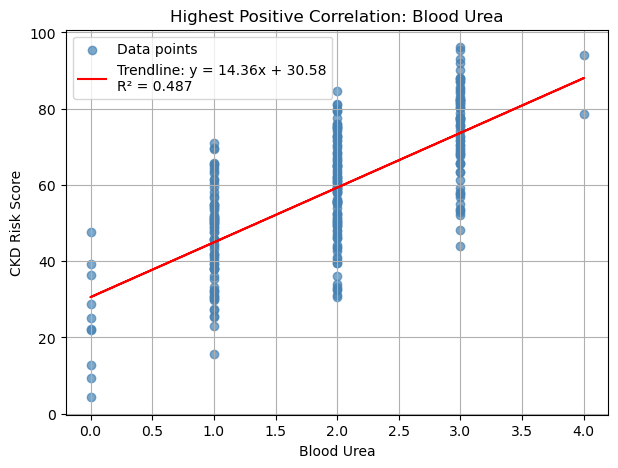

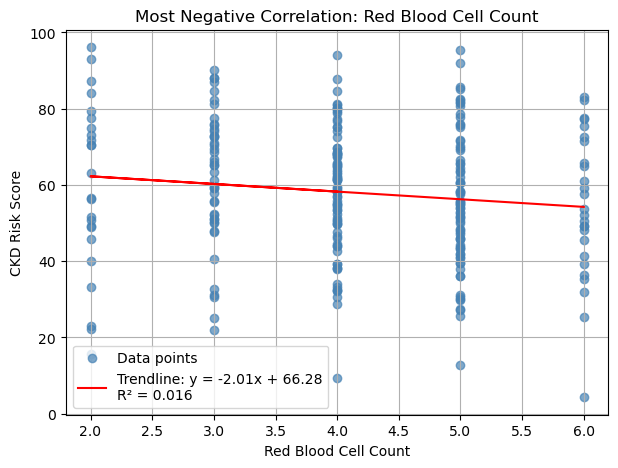

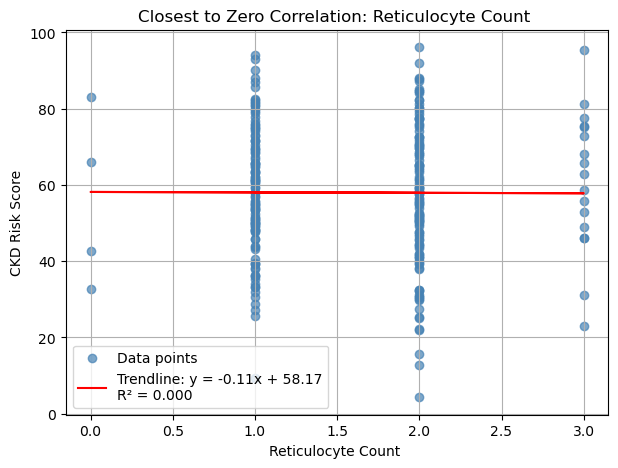

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Identify the 3 variables (reuse from previous code)
highest_corr = num_corr.idxmax()
lowest_corr = num_corr.idxmin()
closest_to_zero = num_corr.iloc[(num_corr - 0).abs().argsort()[:1]].index[0]

# Step 2: Function to create scatter plots with trendline and equation
def scatter_with_trendline(x, y, title):
    # Calculate linear regression
    coeffs = np.polyfit(x, y, 1)
    slope, intercept = coeffs
    line = slope * x + intercept

    # Calculate R-squared
    r = np.corrcoef(x, y)[0, 1]
    r2 = r**2

    # Plot scatter and trendline
    plt.figure(figsize=(7, 5))
    plt.scatter(x, y, color='steelblue', alpha=0.7, label='Data points')
    plt.plot(x, line, color='red', label=f'Trendline: y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.3f}')
    plt.title(f'{title}')
    plt.xlabel(x.name)
    plt.ylabel('CKD Risk Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Generate the three scatter diagrams
scatter_with_trendline(corr_df[highest_corr], corr_df['CKD Risk Score'], 
                       f'Highest Positive Correlation: {highest_corr}')

scatter_with_trendline(corr_df[lowest_corr], corr_df['CKD Risk Score'], 
                       f'Most Negative Correlation: {lowest_corr}')

scatter_with_trendline(corr_df[closest_to_zero], corr_df['CKD Risk Score'], 
                       f'Closest to Zero Correlation: {closest_to_zero}')
